* NLP 트렌드 정리

### 1. 사전 훈련된 워드 임베딩
-----------------------
임베딩 방법에는 두가지가 있음. 1) 임베딩층(Embedding layer)을 랜덤 초기화하여 처음부터 학습하는 방법. 2)방대한 데이터로 Word2Vec 등과 같은 임베딩 알고리즘으로 사전에 학습된 임베딩 벡터들을 가져와 사용하는 방법임

만약 사용할 데이터가 적다면, 사전 훈련된 임베딩을 사용하면 성능 향상을 기대할 수 있음

그러나, 이 두가지 방법 모두 하나의 단어가 하나의 벡터값으로 맵핑되므로, 문맥을 고려하지 못하여 다의어나 동음이의어를 구분하지 못하는 문제점이 있음

이 한계는 사전 훈련된 언어모델을 사용함으로써 극복할 수 있으며, 이를 해결한 것이 ELMo, BERT 등임

### 2. 사전 훈련된 언어 모델
--------------------
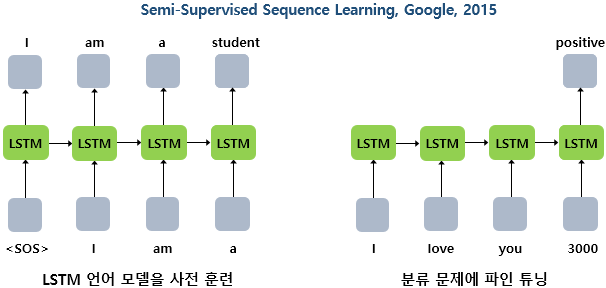

**LSTM 언어 모델**

이 언어모델은 주어진 텍스트로부터 이전 단어들로부터 다음 단어를 예측하도록 학습하기 때문에, 기본적으로 별도의 레이블이 없는 텍스트 데이터로도 학습 가능함

사전 훈련된 워드 임베딩과 마찬가지로 사전 훈련된 언어모델의 강점은 학습전 사람이 별로 레이블을 지정해 줄 필요가 없다는 점임

이렇게 레이블이 없는 데이터로 학습된 LSTM과 가중치가 랜덤으로 초기화된 LSTM 두가지를 두고, 텍스트 분류와 같은 문제를 학습하여 사전 훈련된 언어 모델을 사용한 전자의 경우가 더 좋은 성능을 얻을 수 있다는 가능성을 보여줌

방대한 텍스트로 LSTM 언어모델을 학습해 두고, 언어 모델을 다른 태스크에서 높은 성능을 얻기 위해 사용하는 방법으로 ELMo와 같은 아이디어임

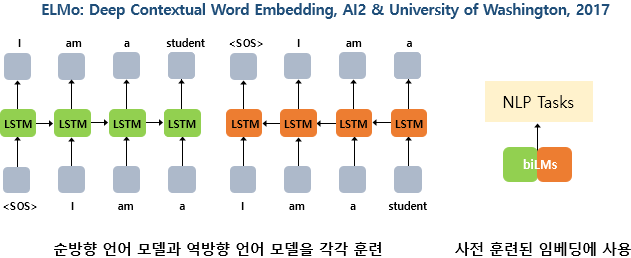

ELMo는 순방향 언어 모델과 역방향 언어모델을 각각 따로 학습시킨 후에, 이렇게 **사전 학습된 언어 모델로부터 임베딩 값을 얻는다**는 아이디어임

이러한 **임베딩은 문맥에 따라 임베딩 벡터값이 달라지므로, 기존 워드 임베딩인 Word2Vec나 GloVe 등이 다의어를 구분할 수 없었던 문제점을 해결**할 수 있었음

이어 언어모델은 RNN 계열의 신경망에서 탈피하기 시작함

트랜스포머가 번역기와 같은 인코더-디코더 구조에서 좋은 성능을 얻자, LSTM이 아닌 트랜스포머로 사전 훈련된 언어모델을 학습하는 시도가 등장함

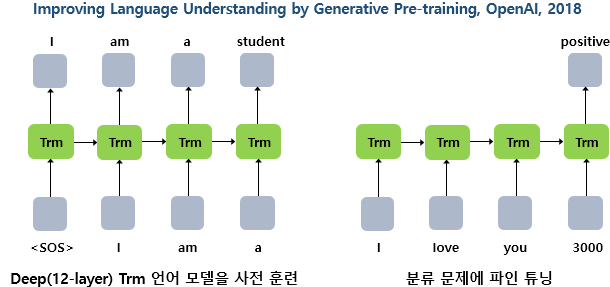

위의 그림에서 Trm은 트랜스포머를 의미하고, 디코더는 LSTM 언어모델처럼 순차적으로 이전 단어들로부터 다음 단어를 예측함

Open AI는 트랜스포머 디코더로 총 12개의 층을 쌓은 후에, 방대한 텍스트 데이터를 학습시킨 언어 모델 GPT-1을 만듦. NLP 주요 트렌드는 사전 훈련된 언어 모델을 만들고 이를 특정 태스크에 추가 학습시켜 해당 태스크에서 높은 성능을 얻는 것으로 접어들었고, 언어모델의 학습방법에 변화를 주는 모델들이 등장함

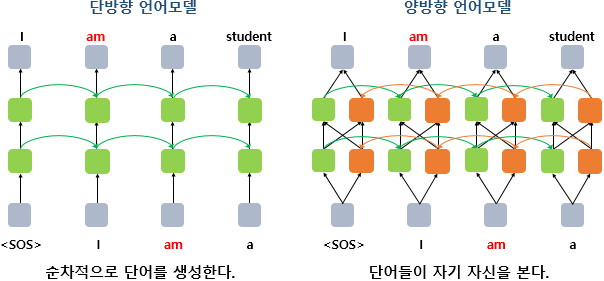



위의 좌측 그림에 있는 단방향 언어모델은 지금까지 배운 전형적인 언어 모델임. 시작토른 \<sos>가 들어가면, 다음 단어 i를 예측하고, 그리고 그 다음 단어 am를 예측함.

반면, 우측에 있는 양방향 언어모델은 양방향 LSTM을 이용한 것으로, 초록색 LSTM 셀은 순방향 언어모델로 \<sos>를 입력받아 I를 예측하고, 그 후에 am을 예측함. 그런데 am을 예측할 때, 출력층은 주황색 LSTM 셀인 역방향 언어 모델의 정보도 함께 받음

am을 예측하는 시점에서 역방향 언어모델이 이미 관측한 단어는 a, am, I의 3개 단어임. 이미 예측해야 하는 단어를 역방향 언어모델을 통해 미리 관측한 것으로 실제 양방향으로 구현된 것이 아님

하지만, 언어문맥이라는 것은 실제로 양방향임. 텍스트 분류나 개체명인식 등에서 양방향 LSTM을 사용하여 모델을 구현해서 좋은 성능을 얻을 수 있었음. 그러나 이전 단어들로부터 다음 단어를 예측하는 언어모델의 특성으로 위의 그림과 같은 양방향 언어모델을 사용할 수 없으므로, 그 대안으로 ELMo 언어모델이 개발됨

ELMo에서는 순방향과 역방향이라는 두개의 단방향 언어모델을 따로 준비하여 학습하는 방법임. 기존 언어모델에서는 양방향 구조를 도입할 수 없기 때문에, 양방향 구조를 도입하기 위해 만들어진 것이 ***masked 언어모델**임

### 3. 마스크드 언어 모델(Masked Language Model)
-----------------------
마스크드 언어 모델은 입력텍스트 단어집합의 15% 단어를 랜덤으로 마스킹함. 즉, 원래의 단어가 무엇인지 가리는 것임. 그리고 모델에게 마스킹된 단어들을 예측하도록 함

문장 중간에 구멍을 뚫어놓고 구멍에 들어갈 단어들을 예측하게 하는 방법임. 